In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# currently the identifiers don't map with each other, waiting for Amy response
# but this does bring up a good point, what is this model estimating?
# Kd and cActivator values primarily I suppose, does TF_conc go down/up along with cAMP changes is the goal
# I need a way to do everything from log tpm data really
# TODO - create a pipeline from log tpm to iModulons and everything else to put at front of this if input includes non PRECISE samples
# really not difficult to do, just infer activites by matrix transformation

mapping = {
    'SRX5936089' : 'starve_series__t00_growth1__1', 
    'SRX5936090' : 'starve_series__t00_growth1__2', 
    'SRX5936091' : 'starve_series__t00_growth1__3', 
    'SRX5936092' : 'starve_series__t00_growth1__4', 
    'SRX5936093' : 'starve_series__t01_starve__1', 
    'SRX5936094' : 'starve_series__t01_starve__2', 
    'SRX5936095' : 'starve_series__t02_starve__1', 
    'SRX5936096' : 'starve_series__t02_starve__2', 
    'SRX5936097' : 'starve_series__t03_starve__1', 
    'SRX5936098' : 'starve_series__t03_starve__2', 
    'SRX5936099' : 'starve_series__t04_starve__1', 
    'SRX5936100' : 'starve_series__t04_starve__2', 
    'SRX5936101' : 'starve_series__t05_starve__1', 
    'SRX5936102' : 'starve_series__t05_starve__2', 
    'SRX5936103' : 'starve_series__t06_starve__1', 
    'SRX5936104' : 'starve_series__t06_starve__2', 
    'SRX5936105' : 'starve_series__t07_starve__1', 
    'SRX5936106' : 'starve_series__t07_starve__2', 
    'SRX5936107' : 'starve_series__t08_starve__1', 
    'SRX5936108' : 'starve_series__t08_starve__2', 
    'SRX5936109' : 'starve_series__t09_starve__1', 
    'SRX5936110' : 'starve_series__t09_starve__2', 
    'SRX5936111' : 'starve_series__t10_starve__1', 
    'SRX5936112' : 'starve_series__t10_starve__2', 
    'SRX5936113' : 'starve_series__t11_starve__1', 
    'SRX5936114' : 'starve_series__t11_starve__2', 
    'SRX5936115' : 'starve_series__t12_starve__1', 
    'SRX5936116' : 'starve_series__t12_starve__2', 
    'SRX5936118' : 'starve_series__t14_starve__1', 
    'SRX5936119' : 'starve_series__t14_starve__2', 
    'SRX5936121' : 'starve_series__t16_starve__1', 
    'SRX5936122' : 'starve_series__t16_starve__2', 
    'SRX5936123' : 'starve_series__t17_starve__1', 
    'SRX5936124' : 'starve_series__t17_starve__2', 
    'SRX5936125' : 'starve_series__t18_starve__1', 
    'SRX5936126' : 'starve_series__t18_starve__2', 
    'SRX5936128' : 'starve_series__t20_growth2__1', 
    'SRX5936129' : 'starve_series__t20_growth2__2', 
    'SRX5936130' : 'starve_series__t21_growth2__1', 
    'SRX5936131' : 'starve_series__t21_growth2__2', 
    'SRX5936132' : 'starve_series__t22_growth2__1', 
    'SRX5936133' : 'starve_series__t22_growth2__2', 
    'SRX5936134' : 'starve_series__t23_growth2__1', 
    'SRX5936135' : 'starve_series__t23_growth2__2', 
    'SRX5936137' : 'starve_series__t25_growth2__1', 
    'SRX5936138' : 'starve_series__t25_growth2__2', 
    'SRX5936139' : 'starve_series__t26_growth2__1', 
    'SRX5936140' : 'starve_series__t26_growth2__2', 
    'SRX5936141' : 'starve_series__t27_growth2__1', 
    'SRX5936142' : 'starve_series__t27_growth2__2', 
    'SRX5936143' : 'starve_series__t28_growth2__1', 
    'SRX5936144' : 'starve_series__t28_growth2__2', 
}

In [3]:
# load in, trim samples not included in both data sets
starve_log_tpm = pd.read_csv('../data/validation_data_sets/stationary_phase/project_log_tpm_qc.csv', index_col = 0)
starve_log_tpm = starve_log_tpm.rename(columns = mapping)
starve_log_tpm = starve_log_tpm.drop(columns = ['starve_series__t20_growth2__1', 'starve_series__t20_growth2__2'])
starve_metabs = pd.read_excel('../data/validation_data_sets/stationary_phase/metabolites_data.xlsx', index_col = 0)
starve_metabs = starve_metabs.drop(columns = ['starve_series__t13_starve__1', 'starve_series__t13_starve__2',  'starve_series__t15_starve__1',  'starve_series__t15_starve__2',  'starve_series__t19_starve__1',  'starve_series__t19_starve__2',  'starve_series__t20_starve__1',  'starve_series__t20_starve__2',  'starve_series__t24_growth2__1',  'starve_series__t24_growth2__2',  'starve_series__t29_growth2__1',  'starve_series__t29_growth2__2',  'starve_series__t30_growth2__1',  'starve_series__t30_growth2__2',  'starve_series__t31_growth2__1',  'starve_series__t31_growth2__2',  'starve_series__t32_growth2__1',  'starve_series__t32_growth2__2',  'starve_series__t33_growth2__1',  'starve_series__t33_growth2__2',  'starve_series__t34_growth2__1',  'starve_series__t34_growth2__2'])

In [4]:
# i should average these together realistically...
new_col_to_old_cols = {}
for col in starve_log_tpm:
    new_col = col[:-3]
    if new_col not in new_col_to_old_cols:
        new_col_to_old_cols.update({new_col : []})
    new_col_to_old_cols[new_col].append(col)
new_df = pd.DataFrame(index = starve_log_tpm.index)
for new_col, cols in new_col_to_old_cols.items():
    new_df[new_col] = starve_log_tpm[cols].mean(axis = 1)
    starve_metabs[new_col] = starve_metabs[cols].mean(axis = 1)
starve_metabs = starve_metabs[['metabolic subsystem'] + list(new_col_to_old_cols.keys())]
starve_log_tpm = new_df

In [6]:
# save the trimmed versions
starve_log_tpm.to_csv('../data/validation_data_sets/stationary_phase/cleaned_log_tpm_qc.csv')
starve_metabs.to_csv('../data/validation_data_sets/stationary_phase/cleaned_metabolites_data.csv')

# maybe smooth the curve?

In [17]:
't'+str(int(sample.split('__t')[1].split('_')[0]))

't28'

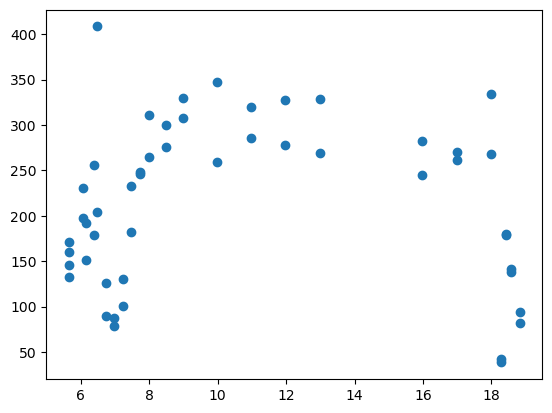

In [25]:
times = 't0_1	t1_1	t2_1	t3_1	t4_1	t5_1	t6_1	t7_1	t8_1	t9_1	t10_1	t11_1	t12_1	t13_1	t14_1	t15_1	t16_1	t17_1	t18_1	t19_1	t20_1	t21_1	t22_1	t23_1	t24_1	t25_1	t26_1	t27_1	t28_1	t29_1	t30_1	t31_1	t32_1	t33_1	t34_1'
hours = '5.65	6.07	6.15	6.38	6.48	6.73	6.98	7.23	7.48	7.73	7.98	8.48	8.98	9.48	9.98	10.48	10.98	11.98	12.98	13.98	14.98	15.98	16.98	17.98	18.18	18.28	18.42	18.58	18.83	19.08	19.33	19.58	20.08	20.58	21.08'
time_to_hours = {k.split('_')[0] : float(v) for k, v in zip(times.split('\t'), hours.split('\t'))}

x_vals = []
y_vals = []
time_to_vals = {}
for sample, val in starve_metabs.loc['Arginine'][1:].items():
    tim = 't'+str(int(sample.split('__t')[1].split('_')[0]))
    x_vals.append(time_to_hours[tim])
    y_vals.append(val)
    if time_to_hours[tim] not in time_to_vals:
        time_to_vals.update({time_to_hours[tim] : []})
    time_to_vals[time_to_hours[tim]].append(val)
plt.scatter(x_vals, y_vals)
plt.show()

In [29]:
starve_metabs.columns

Index(['metabolic subsystem', 'starve_series__t00_growth1__1',
       'starve_series__t00_growth1__2', 'starve_series__t00_growth1__3',
       'starve_series__t00_growth1__4', 'starve_series__t01_starve__1',
       'starve_series__t01_starve__2', 'starve_series__t02_starve__1',
       'starve_series__t02_starve__2', 'starve_series__t03_starve__1',
       'starve_series__t03_starve__2', 'starve_series__t04_starve__1',
       'starve_series__t04_starve__2', 'starve_series__t05_starve__1',
       'starve_series__t05_starve__2', 'starve_series__t06_starve__1',
       'starve_series__t06_starve__2', 'starve_series__t07_starve__1',
       'starve_series__t07_starve__2', 'starve_series__t08_starve__1',
       'starve_series__t08_starve__2', 'starve_series__t09_starve__1',
       'starve_series__t09_starve__2', 'starve_series__t10_starve__1',
       'starve_series__t10_starve__2', 'starve_series__t11_starve__1',
       'starve_series__t11_starve__2', 'starve_series__t12_starve__1',
       'sta

In [28]:
starve_cols

NameError: name 'starve_cols' is not defined

In [27]:
time_to_hours

{'t0': 5.65,
 't1': 6.07,
 't2': 6.15,
 't3': 6.38,
 't4': 6.48,
 't5': 6.73,
 't6': 6.98,
 't7': 7.23,
 't8': 7.48,
 't9': 7.73,
 't10': 7.98,
 't11': 8.48,
 't12': 8.98,
 't13': 9.48,
 't14': 9.98,
 't15': 10.48,
 't16': 10.98,
 't17': 11.98,
 't18': 12.98,
 't19': 13.98,
 't20': 14.98,
 't21': 15.98,
 't22': 16.98,
 't23': 17.98,
 't24': 18.18,
 't25': 18.28,
 't26': 18.42,
 't27': 18.58,
 't28': 18.83,
 't29': 19.08,
 't30': 19.33,
 't31': 19.58,
 't32': 20.08,
 't33': 20.58,
 't34': 21.08}